**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading te Dataset CSV file using pandas**

In [2]:
print("Loading dataset...")
df = pd.read_csv('Competition_Dataset.csv')

Loading dataset...


**A brief overview of the dataset**

Showing number of rows and columns

In [3]:
print("\nDataset Overview:")

# Display the total number of records (rows) in the DataFrame
# df.shape[0] returns the row count of the DataFrame
# This tells us how many crime incidents are recorded in the dataset
print(f"Total records: {df.shape[0]}")

# Display the total number of features (columns) in the DataFrame
# df.shape[1] returns the column count of the DataFrame
# This indicates how many attributes are recorded for each crime incident
print(f"Total features: {df.shape[1]}")

# Print all column names in the DataFrame as a list
print("\nFeature names:", df.columns.tolist())


Dataset Overview:
Total records: 680826
Total features: 9

Feature names: ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)']


**Checking if there is any Null values**

In [4]:
print("\nMissing values:")
# Calculate the number of null/missing values for each column in the DataFrame
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Missing values:
Series([], dtype: int64)


**Converting dates in the rows  to a proccessable date format**

In [5]:
print("\nData Preprocessing...")

# Convert the 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Remove rows with any missing values
df.dropna(inplace=True)

# Print the number of records after cleaning
print(f"Records after cleaning: {df.shape[0]}")


Data Preprocessing...
Records after cleaning: 680826


**Showing the number of incidents per category**

In [6]:
# Category distribution
print("\nCrime Category Distribution:")

# Count the occurrences of each category in the 'Category' column
category_counts = df['Category'].value_counts()

# Print the top 10 most common categories
print(category_counts.head(10))


Crime Category Distribution:
Category
LARCENY/THEFT     157238
OTHER OFFENSES    110857
NON-CRIMINAL       83204
VEHICLE THEFT      48339
DRUG/NARCOTIC      44804
VANDALISM          39963
WARRANTS           38012
BURGLARY           33084
SUSPICIOUS OCC     28125
MISSING PERSON     23338
Name: count, dtype: int64


**Plotting top 10 crimes cateogires**

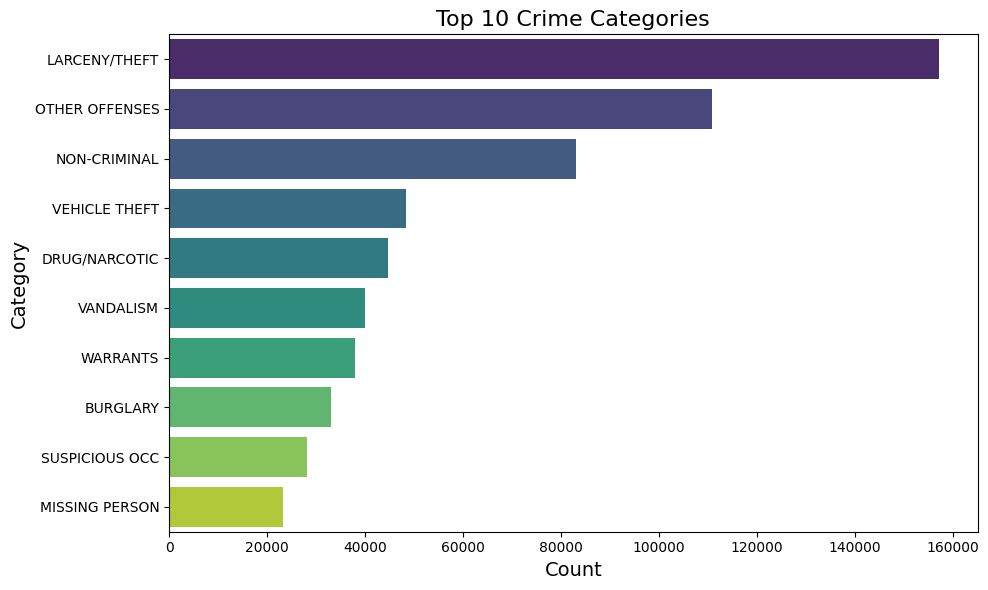

In [7]:
# Save top categories visualization
plt.figure(figsize=(10, 6))

# Get the top 10 most common categories
top_categories = category_counts.head(10)

# Create a bar plot for the top 10 categories
sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    hue=top_categories.index, 
    palette="viridis",
    legend=False  
)

# Set the title and labels for the plot
plt.title('Top 10 Crime Categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

**Plotting the number of incidents for each day of the week**

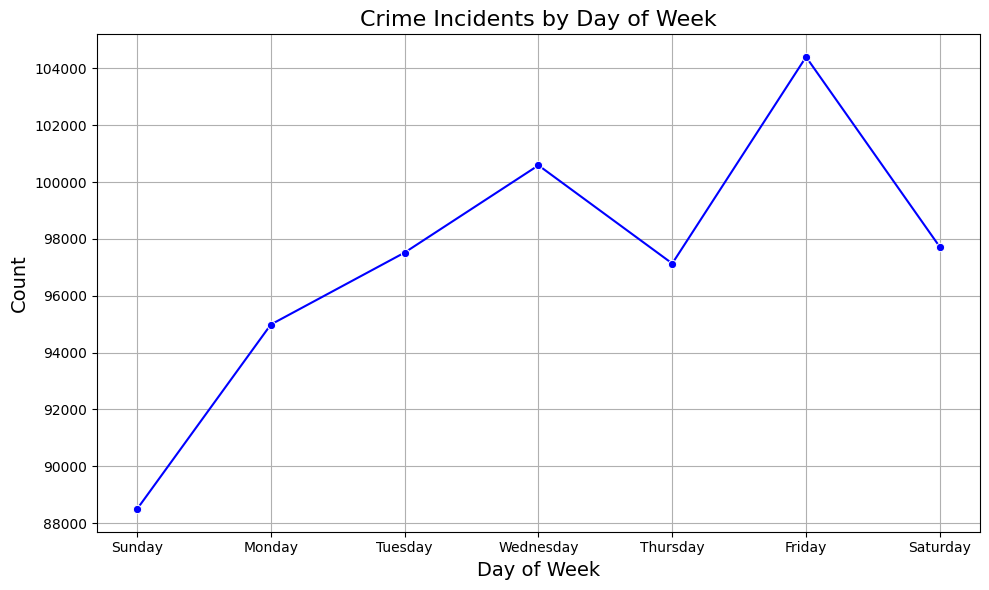

In [8]:
# Day of Week analysis
plt.figure(figsize=(10, 6))

# Define the order of days in a week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Count the occurrences of each day in the 'DayOfWeek' column and reindex to match the day order
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)

# Create a line plot for the day of week counts
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='b')

# Set the title and labels for the plot
plt.title('Crime Incidents by Day of Week', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)

# Enable grid for better readability
plt.grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

**Plotting number of incidents per police district**

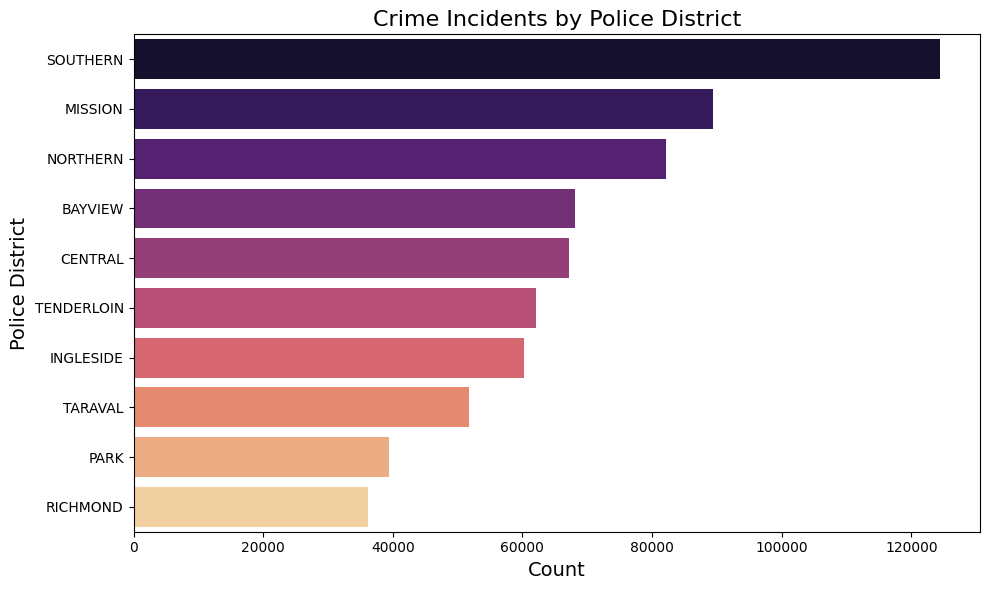

In [9]:
# Police District analysis
plt.figure(figsize=(10, 6))

# Count the occurrences of each police district in the 'PdDistrict' column
district_counts = df['PdDistrict'].value_counts()

# Create a bar plot for the police district counts
sns.barplot(
    x=district_counts.values, 
    y=district_counts.index, 
    hue=district_counts.index, 
    palette="magma",
    legend=False  
)

# Set the title and labels for the plot
plt.title('Crime Incidents by Police District', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Police District', fontsize=14)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

**Plotting a heatmap of the incidents per day of the week per hour**

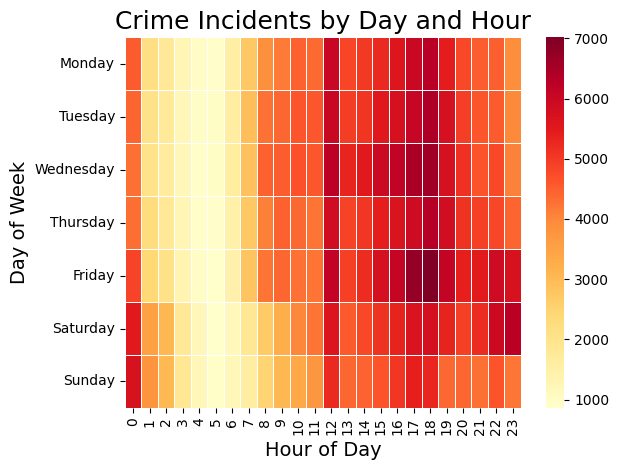

In [10]:
# Extract year, month, and hour from the 'Dates' column
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Hour'] = df['Dates'].dt.hour

# Crime by hour
day_hour_pivot = pd.crosstab(index=df['DayOfWeek'], columns=df['Hour'])

# Reorder days for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour_pivot = day_hour_pivot.reindex(day_order)

# Create heatmap
sns.heatmap(day_hour_pivot, cmap="YlOrRd", annot=False, linewidths=.5)
plt.title('Crime Incidents by Day and Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.tight_layout()
plt.show()

**Plotting the frequency of crimes in each month**

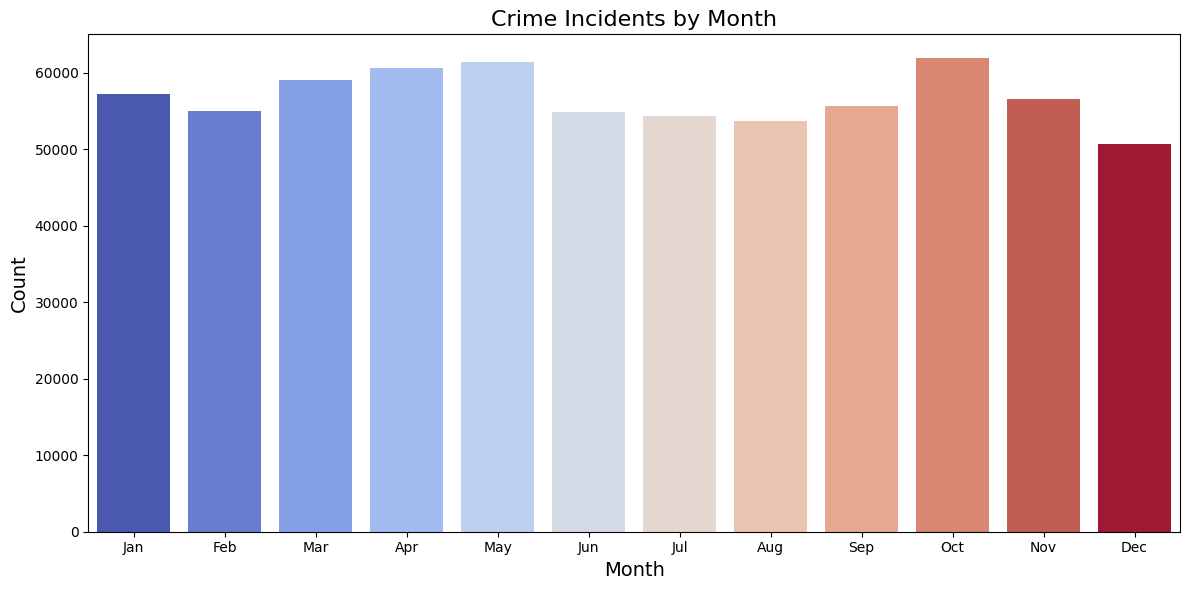

In [11]:
plt.figure(figsize=(12, 6))

# Define the order of months
month_order = range(1, 13)

# Count the occurrences of each month in the 'Month' column and reindex to match the month order
month_counts = df['Month'].value_counts().reindex(month_order)

# Create a bar plot for the month counts
sns.barplot(
    x=month_counts.index, 
    y=month_counts.values, 
    hue=month_counts.index,  
    palette="coolwarm",
    legend=False  
)

# Set the title and labels for the plot
plt.title('Crime Incidents by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set the x-axis labels to the abbreviated month names
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

**Plotting top 10 resolution types**

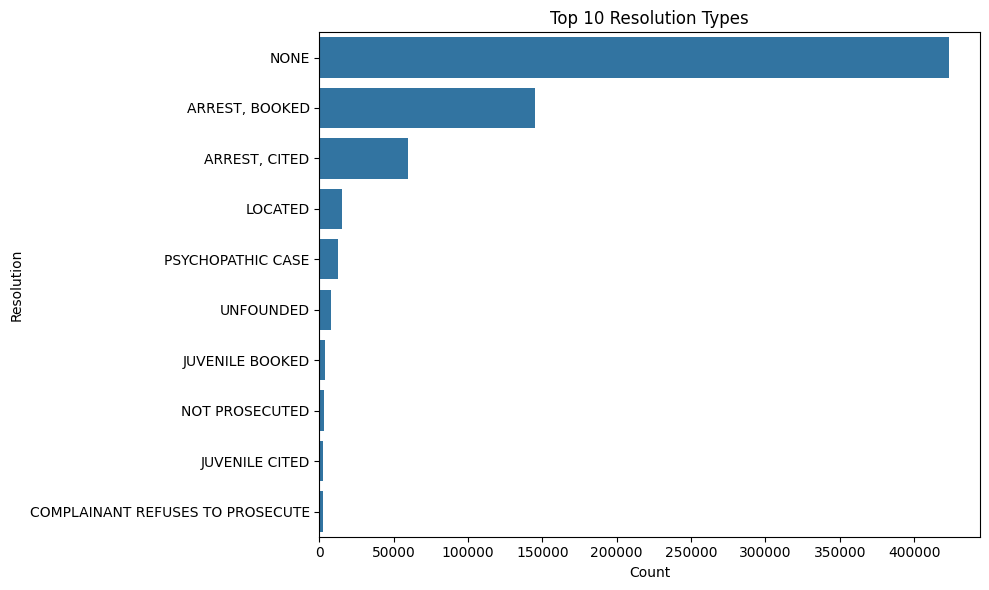

In [12]:
# Resolution analysis
plt.figure(figsize=(10, 6))

# Count the occurrences of each resolution type and get the top 10
resolution_counts = df['Resolution'].value_counts().head(10)

# Create a bar plot for the top 10 resolution types
sns.barplot(x=resolution_counts.values, y=resolution_counts.index)

# Set the title and labels for the plot
plt.title('Top 10 Resolution Types')
plt.xlabel('Count')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

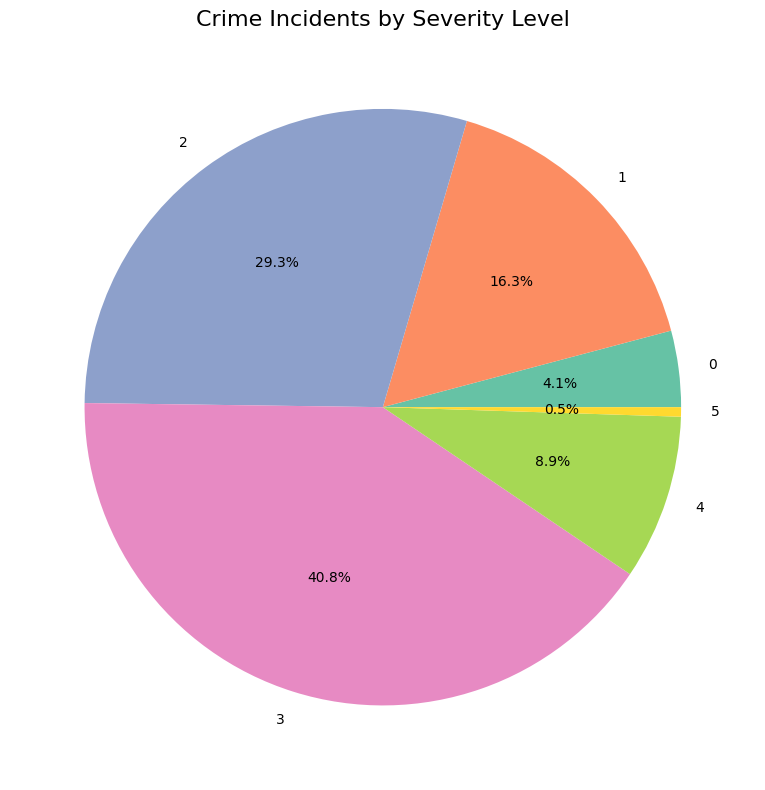

In [13]:
def categorize_severity(category):
    severity_mapping = {
        1: ['NON-CRIMINAL', 'SUSPICIOUS OCCURRENCE', 'MISSING PERSON', 'RUNAWAY', 'RECOVERED VEHICLE'],
        2: ['WARRANTS', 'OTHER OFFENSES', 'VANDALISM', 'TRESPASS', 'DISORDERLY CONDUCT', 'BAD CHECKS'],
        3: ['LARCENY/THEFT', 'VEHICLE THEFT', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY', 'FRAUD', 'BRIBERY', 'EMBEZZLEMENT'],
        4: ['ROBBERY', 'WEAPON LAWS', 'BURGLARY', 'EXTORTION'],
        5: ['KIDNAPPING', 'ARSON']
    }
    for severity, categories in severity_mapping.items():
        if category in categories:
            return severity
    return 0

# Apply the categorize_severity function to the 'Category' column to create a new 'Severity' column
df['Severity'] = df['Category'].apply(categorize_severity)

# Severity distribution
plt.figure(figsize=(8, 8))
severity_counts = df['Severity'].value_counts().sort_index()

# Create a pie chart for the severity distribution
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Set the title for the plot
plt.title('Crime Incidents by Severity Level', fontsize=16)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Deep Learning for Crime Classification

## Training and Evaluation of a DistilBERT Transformer Model

This notebook implements a deep learning approach for crime category classification using the Hugging Face Transformers library. We fine-tune a DistilBERT model (a lighter and faster version of BERT) on our crime description data to predict crime categories.

### Workflow:
1. Data preparation and preprocessing
2. Creating custom PyTorch datasets and dataloaders
3. Fine-tuning the pre-trained DistilBERT model
4. Model evaluation and performance metrics
5. Saving the model for deployment

The model is trained on crime descriptions and evaluated on a held-out test set to measure its effectiveness at categorizing crimes based on textual descriptions.

In [ ]:
import os
import joblib
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split

print("Loading dataset...")
df = pd.read_csv('Competition_Dataset.csv')

class CrimeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

try:
        # Prepare data for transformer model
        print("Preparing data for transformer model...")
        
        # Convert text to list
        texts = df['Descript'].tolist()
        
        # Encode labels
        label_encoder = LabelEncoder()
        encoded_labels = label_encoder.fit_transform(df['Category'])
        
        # Save label encoder
        joblib.dump(label_encoder, 'app/static/transformer_label_encoder.pkl')
        
        # Split data
        train_texts, test_texts, train_labels, test_labels = train_test_split(
            texts, encoded_labels, test_size=0.2, random_state=42
        )
        

        
        # Load pre-trained tokenizer and model
        model_name = "distilbert-base-uncased"  # Smaller and faster than BERT
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(
            model_name, 
            num_labels=len(label_encoder.classes_)
        )
        model.to(device)
        
        # Create datasets
        train_dataset = CrimeDataset(train_texts, train_labels, tokenizer)
        test_dataset = CrimeDataset(test_texts, test_labels, tokenizer)
        
        # Create dataloaders
        train_loader = DataLoader(
            train_dataset,
            batch_size=128,  # Adjust based on your GPU memory
            shuffle=True
        )
        
        test_loader = DataLoader(
            test_dataset,
            batch_size=128
        )
        
        # Training parameters
        optimizer = AdamW(model.parameters(), lr=5e-5)
        num_epochs = 3  # Start with fewer epochs to save time
        
        # Training loop
        print(f"Training transformer model for {num_epochs} epochs...")
        for epoch in range(num_epochs):
            model.train()
            total_loss = 0
            progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
            
            for batch in progress_bar:
                # Move batch to device
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                # Zero gradients
                optimizer.zero_grad()
                
                # Forward pass
                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )
                
                loss = outputs.loss
                total_loss += loss.item()
                
                # Backward pass and optimize
                loss.backward()
                optimizer.step()
                
                # Update progress bar
                progress_bar.set_postfix({'loss': total_loss / (progress_bar.n + 1)})
            
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")
        
        # Save the model and tokenizer
        print("Saving transformer model...")
        os.makedirs('app/static/transformer_model', exist_ok=True)
        model.save_pretrained('app/static/transformer_model')
        tokenizer.save_pretrained('app/static/transformer_tokenizer')
        
        # Evaluation
        print("Evaluating transformer model...")
        model.eval()
        predictions = []
        actual_labels = []
        
        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Evaluating"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask
                )
                
                _, preds = torch.max(outputs.logits, dim=1)
                
                predictions.extend(preds.cpu().tolist())
                actual_labels.extend(labels.cpu().tolist())
        
        # Convert back to original labels
        predictions = label_encoder.inverse_transform(predictions)
        actual_labels = label_encoder.inverse_transform(actual_labels)
        
        # Print classification report
        print("Transformer Classification Report:")
        transformer_report = classification_report(actual_labels, predictions)
        print(transformer_report)
        
        # Save report to file
        with open('app/static/transformer_classification_report.txt', 'w') as f:
            f.write(transformer_report)
            
        # Calculate and print accuracy
        accuracy = accuracy_score(actual_labels, predictions)
        print(f"Transformer model accuracy: {accuracy:.4f}")
     
        print("Transformer model training and evaluation completed!")
        
except Exception as e:
        print(f"Error in transformer model training: {str(e)}")
        import traceback
        traceback.print_exc()
        print("Transformer model training failed!")

Loading dataset...

--- Exploratory Data Analysis ---

Dataset Overview:
Total records: 680826
Total features: 9

Feature names: ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)']

Missing values:
Series([], dtype: int64)

Data Preprocessing...
Records after cleaning: 680826

Summary Statistics:
        Latitude (Y)  Longitude (X)
count  680826.000000  680826.000000
mean     -122.422852      37.771560
std         0.030744       0.470065
min      -122.513642      37.707879
25%      -122.433532      37.752837
50%      -122.416517      37.775421
75%      -122.406843      37.784464
max      -120.500000      90.000000

Crime Category Distribution:
Category
LARCENY/THEFT     157238
OTHER OFFENSES    110857
NON-CRIMINAL       83204
VEHICLE THEFT      48339
DRUG/NARCOTIC      44804
VANDALISM          39963
WARRANTS           38012
BURGLARY           33084
SUSPICIOUS OCC     28125
MISSING PERSON     23338
Name: count, dtype: in

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training transformer model for 3 epochs...


Epoch 1/3: 100%|██████████| 4256/4256 [48:23<00:00,  1.47it/s, loss=0.0307]


Epoch 1/3, Loss: 0.0307


Epoch 2/3: 100%|██████████| 4256/4256 [48:26<00:00,  1.46it/s, loss=0.00697]


Epoch 2/3, Loss: 0.0070


Epoch 3/3: 100%|██████████| 4256/4256 [48:26<00:00,  1.46it/s, loss=0.00654]


Epoch 3/3, Loss: 0.0065
Saving transformer model...
Evaluating transformer model...


Evaluating: 100%|██████████| 1064/1064 [04:23<00:00,  4.03it/s]


Transformer Classification Report:
                        precision    recall  f1-score   support

                 ARSON       1.00      1.00      1.00       294
            BAD CHECKS       1.00      1.00      1.00        86
               BRIBERY       1.00      1.00      1.00        51
              BURGLARY       1.00      1.00      1.00      6678
    DISORDERLY CONDUCT       1.00      1.00      1.00       819
         DRUG/NARCOTIC       1.00      1.00      1.00      8998
          EMBEZZLEMENT       1.00      1.00      1.00       204
             EXTORTION       1.00      1.00      1.00        43
FORGERY/COUNTERFEITING       1.00      1.00      1.00      1729
                 FRAUD       1.00      1.00      1.00      2994
            KIDNAPPING       1.00      1.00      1.00       415
         LARCENY/THEFT       1.00      1.00      1.00     31593
        MISSING PERSON       1.00      1.00      1.00      4601
          NON-CRIMINAL       1.00      1.00      1.00     16662
    